# IMPORTANDO BIBLIOTECAS E DATASET

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.patches as mpatches

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv')

In [13]:
df.head()

,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases
0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,0,1,1
2,2020-02-26,Brazil,SP,São Paulo/SP,3550308,0,0,0,1
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,0,1
4,2020-02-27,Brazil,SP,São Paulo/SP,3550308,0,0,0,1


In [14]:
df.city.unique()

array(['São Paulo/SP', 'TOTAL', 'Barra Mansa/RJ', ..., 'Rincão/SP',
       'São Tomás de Aquino/MG', 'Várzea Paulista/SP'], dtype=object)

# FILTRANDO OS DADOS DOS ESTADOS

In [15]:
agrupado = df.groupby('city').sum()['totalCases'].reset_index()
agrupado.sort_values(by=['totalCases'], inplace=True)
agrupado = agrupado.query('city != "TOTAL"')
agrupado = agrupado[~agrupado["city"].str.contains("INDEFINIDA")].reset_index().drop(columns='index')
agrupado.tail(15)

,city,totalCases
1034,Guarulhos/SP,1723
1035,Natal/RN,1748
1036,São Bernardo do Campo/SP,1955
1037,Florianópolis/SC,2142
1038,São Luís/MA,3208
1039,Curitiba/PR,3604
1040,Recife/PE,4749
1041,Salvador/BA,4777
1042,Porto Alegre/RS,4929
1043,Belo Horizonte/MG,5186


In [16]:
nao_especificada = df.groupby('city').sum()['totalCases'].reset_index()
nao_especificada.sort_values(by=['totalCases'], inplace=True)
nao_especificada = nao_especificada[nao_especificada["city"].str.contains("INDEFINIDA")].reset_index().drop(columns='index')
nao_especificada = nao_especificada.query('totalCases > 0')
novo_ne = nao_especificada["city"].str.split("/", n = 1, expand = True) 
nao_especificada["ESTADO"]= novo_ne[1] 
nao_especificada.drop(columns =["city"], inplace = True) 
nao_especificada.columns = ['NaoEspecificadas', 'Estado']
nao_especificada

,NaoEspecificadas,Estado
0,2,MS
1,3,PI
2,11,AC
3,15,PA
4,16,PB
5,22,RO
6,37,MT
7,41,RS
8,66,BA
9,81,AP


In [17]:
quinze_cidades = agrupado.city.to_numpy()
quinze_cidades

array(['São Miguel do Guamá/PA', 'Matias Barbosa/MG',
       'Chapada dos Guimarães/MT', ..., 'Fortaleza/CE',
       'Rio de Janeiro/RJ', 'São Paulo/SP'], dtype=object)

In [0]:
df.columns = ['data', 'pais', 'estado', 'cidade', 'ibgeID', 'novasMortes', 'mortes', 'novosCasos', 'totalCasos']

# CRIANDO O DATASET TRATADO

In [0]:
def cria_df(situacao, corte):

  novo_df = pd.DataFrame()
  cont_dfs = []
  for cidade in quinze_cidades: 
    df_cidades = df.loc[df.cidade == cidade, : ]
    df_cidades = df_cidades.groupby('data').sum()[situacao].reset_index()
    df_cidades = df_cidades.loc[df_cidades[situacao] >= corte, : ]
    df_cidades = df_cidades.drop(columns='data')
    df_cidades.columns = [cidade]
    df_cidades = df_cidades.reset_index().drop(columns='index')

    cont_dfs = np.append(cont_dfs, int(df_cidades.count()[0]))
    max_dias = cont_dfs.max()



  for cidade in quinze_cidades:
    df_cidades = df.loc[df.cidade == cidade, : ]
    df_cidades = df_cidades.groupby('data').sum()[situacao].reset_index()
    df_cidades = df_cidades.loc[df_cidades[situacao] >= corte, : ]
    df_cidades = df_cidades.drop(columns='data')
    df_cidades.columns = [cidade]
    df_cidades = df_cidades.reset_index().drop(columns='index')

    qtd_dias = df_cidades[cidade].count()
    dias = list(range(qtd_dias,int(max_dias)))
    for dia in dias:
      df_cidades.loc[dia] = [0]

        
    novo_df = pd.concat([novo_df, df_cidades], ignore_index=False, axis=1)
    novo_df.replace(0, np.nan, inplace=True)

    corte_ = corte
  return novo_df

In [20]:
dataframe_estados = cria_df('mortes', 1)
dataframe_estados

,São Miguel do Guamá/PA,Matias Barbosa/MG,Chapada dos Guimarães/MT,Alto Rio Novo/ES,Camaquã/RS,Goianá/MG,Araxá/MG,Guaranésia/MG,Maués/AM,Cajuru/SP,Nhandeara/SP,Ouriçangas/BA,Uruaçu/GO,Trajano de Moraes/RJ,Cataguases/MG,Mairinque/SP,Forquilha/CE,Rincão/SP,Pilar do Sul/SP,Bariri/SP,Várzea Paulista/SP,Pirenópolis/GO,Ituporanga/SC,Jutaí/AM,Mongaguá/SP,Lins/SP,Passos/MG,São Tomás de Aquino/MG,Conchas/SP,Icatu/MA,Leme/SP,Venâncio Aires/RS,Ubatuba/SP,Graça/CE,Jataizinho/PR,Canavieiras/BA,Macatuba/SP,Salinópolis/PA,Paraúna/GO,Capanema/PA,...,Nova Iguaçu/RJ,Cuiabá/MT,Juiz de Fora/MG,Londrina/PR,Blumenau/SC,João Pessoa/PB,Taboão da Serra/SP,São José dos Campos/SP,Boa Vista/RR,Serra/ES,Mossoró/RN,São Caetano do Sul/SP,Rio Branco/AC,Campinas/SP,Campo Grande/MS,Volta Redonda/RJ,Vitória/ES,Macapá/AP,Vila Velha/ES,Osasco/SP,Santos/SP,Goiânia/GO,Belém/PA,Santo André/SP,Niterói/RJ,Guarulhos/SP,Natal/RN,São Bernardo do Campo/SP,Florianópolis/SC,São Luís/MA,Curitiba/PR,Recife/PE,Salvador/BA,Porto Alegre/RS,Belo Horizonte/MG,Manaus/AM,Brasília/DF,Fortaleza/CE,Rio de Janeiro/RJ,São Paulo/SP
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,2.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,2.0,NaN,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,3
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,4.0,5.0,5
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,1.0,2.0,2.0,2.0,4.0,5.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,2.0,2.0,3.0,2.0,4.0,5.0,6.0,9
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,2.0,2.0,NaN,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,NaN,1.0,2.0,1.0,2.0,3.0,3.0,4.0,7.0,3.0,1.0,2.0,2.0,4.0,2.0,1.0,5.0,4.0,3.0,2.0,3.0,5.0,5.0,5.0,6.0,9
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,2.0,2.0,NaN,7.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0,NaN,1.0,2.0,1.0,2.0,3.0,4.0,4.0,8.0,3.0,1.0,2.0,2.0,4.0,3.0,1.0,5.0,4.0,5.0,2.0,3.0,9.0,6.0,6.0,9.0,9
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,2.0,NaN,7.0,1.0,NaN,2.0,1.0,3.0,1.0,2.0,4.0,NaN,2.0,2.0,1.0,2.0,2.0,5.0,4.0,11.0,3.0,1.0,2.0,2.0,5.0,3.0,2.0,6.0,4.0,5.0,2.0,3.0,11.0,7.0,6.0,13.0,9
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,3.0,NaN,8.0,1.0,NaN,2.0,1.0,3.0,1.0,3.0,4.0,NaN,2.0,2.0,3.0,2.0,3.0,6.0,5.0,11.0,3.0,1.0,2.0,3.0,5.0,3.0,2.0,6.0,5.0,7.0,3.0,4.0,15.0,7.0,17.0,13.0,9
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,8.0,1.0,NaN,2.0,2.0,3.0,1.0,3.0,5.0,NaN,2.0,2.0,3.0,2.0,3.0,6.0,5.0,11.0,3.0,1.0,2.0,3.0,6.0,3.0,4.0,6.0,6.0,8.0,3.0,5.0,19.0,10

# PLOTANDO GRÁFICOS

In [21]:
max_cidade = []
for cidade in quinze_cidades:  
  max_cidade = np.append(max_cidade, dataframe_estados[cidade].max())

max_cidade = pd.DataFrame(data=max_cidade, columns=['maximo'])
max_cidade['cidades'] = quinze_cidades
max_cidade.sort_values(by=['maximo'], inplace=True, ascending=False)
max_cidade.head(20)

,maximo,cidades
1048,512.0,São Paulo/SP
1047,115.0,Rio de Janeiro/RJ
1046,78.0,Fortaleza/CE
1044,60.0,Manaus/AM
1040,46.0,Recife/PE
1038,30.0,São Luís/MA
1034,19.0,Guarulhos/SP
1045,17.0,Brasília/DF
1002,16.0,Duque de Caxias/RJ
1028,13.0,Osasco/SP


In [0]:
from matplotlib.ticker import FormatStrFormatter

In [0]:
 def gera_cidades(com_destaque): 
  sem_destaque = quinze_cidades
  acha_index = np.in1d(sem_destaque, com_destaque).nonzero()[0]
  sem_destaque = np.delete(sem_destaque, acha_index)
  return sem_destaque

In [0]:
hoje = date.today()
data_hoje = hoje.strftime("%B %d, %Y")

In [0]:
corte = int(dataframe_estados.iloc[1,:].min())

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


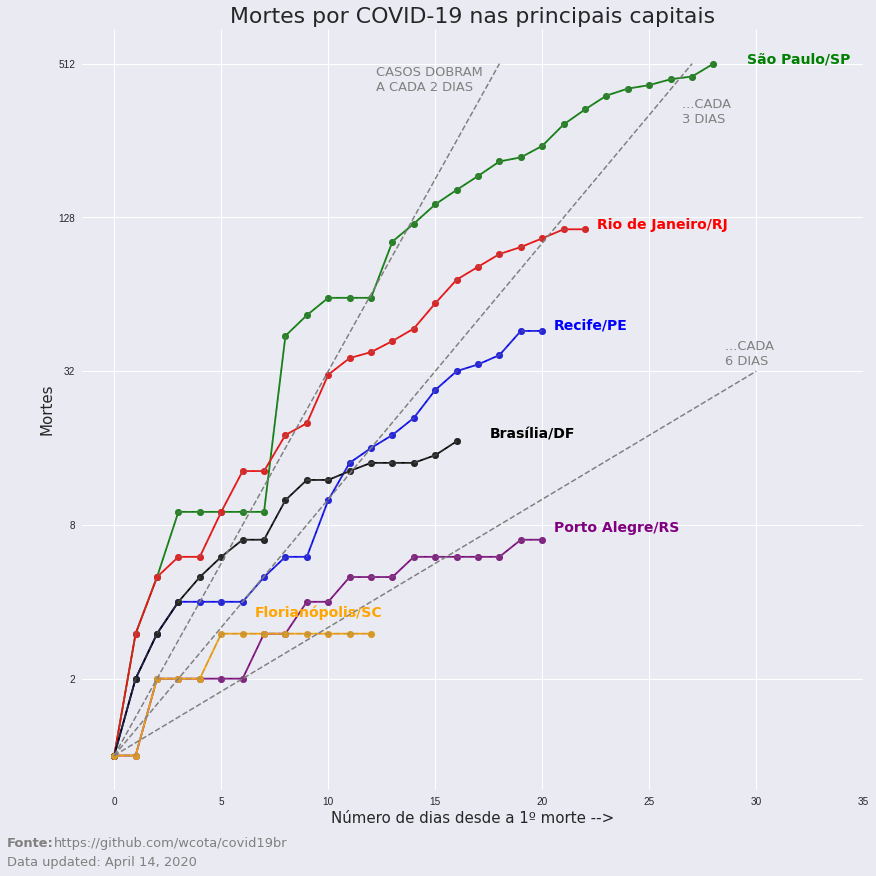

In [26]:
califonte = {'fontname':'Calibri'}


com_destaque = ['São Paulo/SP', 'Rio de Janeiro/RJ', 'Porto Alegre/RS', 'Recife/PE', 'Brasília/DF', 'Florianópolis/SC']
cidades_sem_destaque = gera_cidades(com_destaque)

plt.figure(figsize=(14, 14), facecolor='#EAEAF2')
plt.style.use('seaborn')
i=0
c=0

max_cidade_f = max_cidade.query('cidades != @com_destaque').reset_index().drop(columns='index')
max_cidade_c = max_cidade.query('cidades == @com_destaque').reset_index().drop(columns='index')

# plotando cidades sem destaques
#for cidade in cidades_sem_destaque:  
#  plt.plot(dataframe_estados[cidade], label=cidade, color='#CCCBCA')
#  plt.plot(dataframe_estados[cidade], color='grey', alpha=0.3)
#  plt.yscale('log', basey=2)
#  plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.d'))

# plotando cidades com destaques
cores = ['green', 'red', 'purple', 'blue', 'black', 'orange', 'brown']
for cidade in com_destaque:  
  plt.plot(dataframe_estados[cidade], 'o-',label=cidade, color=cores[c])
  plt.plot(dataframe_estados[cidade],'o--', color='grey', alpha=0.3)
  plt.yscale('log', basey=2)
  plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.d'))
  plt.title('Mortes por COVID-19 nas principais capitais', fontsize=22, pad=6, **califonte)
  plt.grid(True)
  plt.xlabel(f'Número de dias desde a {corte}º morte -->', fontsize=15, **califonte)
  plt.ylabel('Mortes', fontsize=15, **califonte)
  #if cidade in ['São Paulo/SP', 'Brasília/DF']:
  plt.text(x=((dataframe_estados[cidade].loc[dataframe_estados[cidade] == max_cidade_c.loc[max_cidade_c['cidades'] == cidade].reset_index().drop(columns='index').maximo[i]]).index[0] + 1.55), y=(max_cidade_c.loc[max_cidade_c['cidades'] == cidade].reset_index().drop(columns='index').maximo[i])+0.5, s=cidade, fontsize=14, color=cores[c], **califonte, fontweight='bold')

  c += 1
plt.text(x=-5, y=0.44, s='Fonte:', fontsize=13, color='grey', fontweight='bold', **califonte)
plt.text(x=-2.8, y=0.44,s= 'https://github.com/wcota/covid19br', fontsize=13, color='grey', **califonte)
plt.text(x=-5, y=0.37,s= f'Data updated: {data_hoje}', fontsize=13, color='grey', **califonte)
plt.plot([0,27], [1,512], '--', color='grey', linewidth=1.5) #dobra a cada 5 dias
plt.plot([0,18], [1,512], '--', color='grey', linewidth=1.5) #dobra a cada 2.5 dias
plt.plot([0,30], [1,32], '--', color='grey', linewidth=1.5) #dobra a cada 7 dias
plt.text(x=12.25, y=400, s='CASOS DOBRAM \nA CADA 2 DIAS', fontsize=13, color='grey', **califonte)
plt.text(x=26.55, y=300, s='...CADA \n3 DIAS', fontsize=13, color='grey', **califonte)
plt.text(x=28.55, y=34, s='...CADA \n6 DIAS', fontsize=13, color='grey', **califonte)
plt.xticks(range(0, int(dataframe_estados.index.max()+10), 5))


#plt.legend(('Niterói/RJ', 'São Bernardo do Campo/SP', 'Santo André/SP', 'Osasco/SP', 'Santos/SP'), color=('green', 'red', 'purple', 'blue', 'black'), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#green = mpatches.Patch(color=cores[1], label='Niterói/RJ')
#red = mpatches.Patch(color=cores[2], label='São Bernardo do Campo/SP')
#purple = mpatches.Patch(color=cores[3], label='Santo André/SP')
#blue =  mpatches.Patch(color=cores[4], label='Osasco/SP')
#black =  mpatches.Patch(color=cores[5], label='Santos/SP')
#plt.legend(handles=[green, red, purple, blue, black], bbox_to_anchor=(0.24, 0.98), loc='upper right', borderaxespad=0.)
plt.savefig('casos_confirmados_cidades_ncapitais.png')